In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Як відомо, мистецтво це відображення реального світу. Побутує
думка, що наш світ стає все жорстокішим. Поглянемо на цю
проблему через призму сучасного кінематографу. В якості
критерію жорсткості фільму будемо використовувати кількість
персонажів, яких в ньому вбито.

In [3]:
setwd("/home/olexandr/Documents/GitHub/Statistics_R/data_source")

In [5]:
movie_body_counts <- read.csv('filmdeathcounts.csv')

In [7]:
head(movie_body_counts) # Перевіримо як зчитався файл

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>
1,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3
2,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6
3,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0
4,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6
5,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7
6,3:10 To Yuma,2007,45,R,Adventure|Crime|Drama|Western,James Mangold,122,7.8


In [9]:
str(movie_body_counts) #Переглянемо структуру даних

'data.frame':	545 obs. of  8 variables:
 $ Film          : chr  "24 Hour Party People" "28 Days Later" "28 Weeks Later" "30 Days of Night" ...
 $ Year          : int  2002 2002 2007 2007 2007 2007 1999 1986 1987 1977 ...
 $ Body_Count    : int  7 53 212 67 600 45 1 65 199 243 ...
 $ MPAA_Rating   : chr  "R" "R" "R" "R" ...
 $ Genre         : chr  "Biography|Comedy|Drama|Music" "Horror|Sci-Fi|Thriller" "Horror|Sci-Fi|Thriller" "Horror|Thriller" ...
 $ Director      : chr  "Michael Winterbottom" "Danny Boyle" "Juan Carlos Fresnadillo" "David Slade" ...
 $ Length_Minutes: int  117 113 100 113 117 122 123 95 105 175 ...
 $ IMDB_Rating   : num  7.3 7.6 7 6.6 7.7 7.8 6.4 7.5 7.3 7.4 ...


Додамо нове поле body_per_min, яке містить відношення всіх
вбитих у фільмі до довжини фільму в хвилинах:

In [12]:
# Додамо нове поле body_per_min, яке містить відношення всіх вбитих у фільмі до довжини фільму в хвилинах:
movie_body_counts$body_per_min <- movie_body_counts$Body_Count/movie_body_counts$Length_Minutes

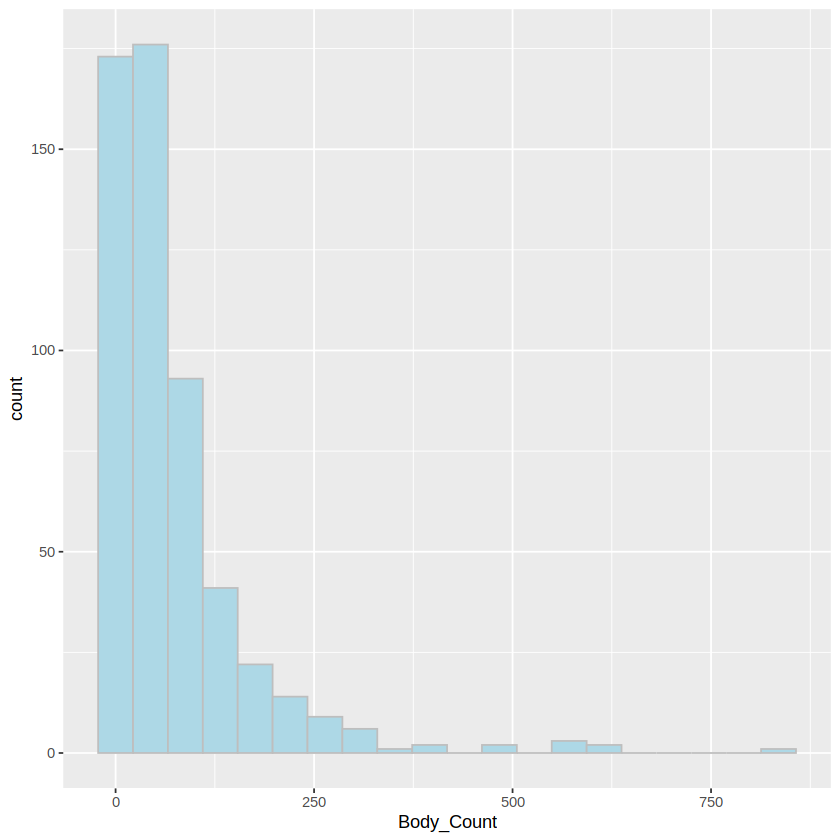

In [14]:
# Побудуємо гістограму для кількості персонажів, які загинули:
ggplot(movie_body_counts, aes(x=Body_Count)) +
 geom_histogram(bins=20, color="grey", fill="lightblue") 

In [16]:
#Знайдемо топ 10 фільмів, де загинуло найбільше персонажів:
movie_body_counts %>%
 top_n(n = 10, Body_Count) %>%
 arrange(desc(Body_Count))

Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,body_per_min
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
Lord of the Rings: Return of the King,2003,836,PG-13,Action|Adventure|Fantasy,Peter Jackson,201,8.9,4.159204
Kingdom of Heaven,2005,610,R,Action|Adventure|Drama|History|War,Ridley Scott,144,7.1,4.236111
300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7,5.128205
Tae Guk Gi: The Brotherhood of War,2004,590,R,Action|Drama|War,Je-kyu Kang,140,8.1,4.214286
Troy,2004,572,R,Adventure|Drama,Wolfgang Petersen,163,7.1,3.509202
The Last Samurai,2003,558,R,Action|Drama|History|War,Edward Zwick,154,7.7,3.623377
A Fistful of Dynamite,1971,471,PG,Adventure|Western,Sergio Leone,138,7.7,3.413043
Lord of the Rings: Two Towers,2002,468,PG-13,Action|Adventure|Fantasy,Peter Jackson,179,8.7,2.614525
Windtalkers,2002,389,R,Action|Drama|War,John Woo,134,5.9,2.902985


In [18]:
#Та фільми, де загинуло найбільше кількість персонажів по відношенню до довжини фільму:
movie_body_counts %>%
 top_n(n = 10, body_per_min) %>%
 arrange(desc(body_per_min))

Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,body_per_min
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7,5.128205
Kingdom of Heaven,2005,610,R,Action|Adventure|Drama|History|War,Ridley Scott,144,7.1,4.236111
Tae Guk Gi: The Brotherhood of War,2004,590,R,Action|Drama|War,Je-kyu Kang,140,8.1,4.214286
Lord of the Rings: Return of the King,2003,836,PG-13,Action|Adventure|Fantasy,Peter Jackson,201,8.9,4.159204
The Last Samurai,2003,558,R,Action|Drama|History|War,Edward Zwick,154,7.7,3.623377
Troy,2004,572,R,Adventure|Drama,Wolfgang Petersen,163,7.1,3.509202
A Fistful of Dynamite,1971,471,PG,Adventure|Western,Sergio Leone,138,7.7,3.413043
King Arthur,2004,378,R,Action|Adventure|Drama,Antoine Fuqua,126,6.2,3.000000
The Big Red One,1980,338,R,Action|Drama|War,Samuel Fuller,113,7.3,2.991150


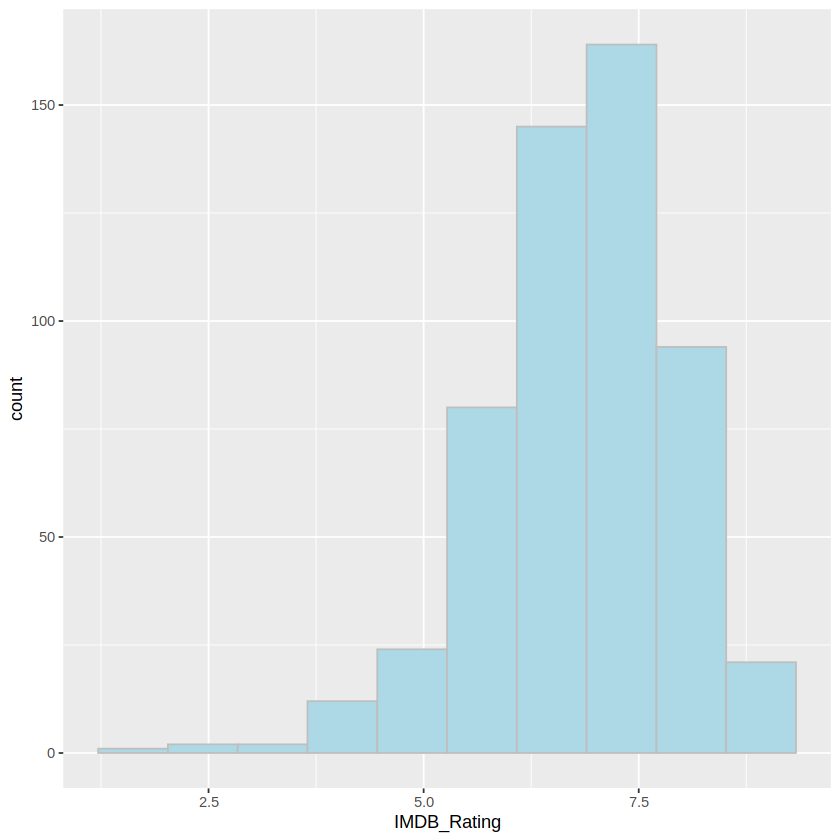

In [20]:
#Побудуємо гістограму для IMDB рейтингу:
ggplot(movie_body_counts, aes(x=IMDB_Rating)) +
 geom_histogram(bins=10, color="grey", fill="lightblue")

Знайдемо середнє значення та середньоквадратичне відхилення
для змінної IMDBrating, змінним дамо назви imdb_mean та
imdb_sd:

In [25]:
imdb_mean <- mean(movie_body_counts$IMDB_Rating)

In [27]:
imdb_mean

[1] 6.835963

In [29]:
imdb_sd <- sd(movie_body_counts$IMDB_Rating)

In [31]:
imdb_sd

[1] 1.113516

Давайте згенеруємо нормальний розподіл, який має середнє
значення imdb_mean та середньоквадратичне відхилення
imdb_sd. Для цього використаємо функцію rnorm. Для того,
щоб послідовність, яка генерується була сталою, при кожному
виконанні нашого коду, встановимо параметр set.seed

In [34]:
set.seed(900)
imdb_simulation <- rnorm(n=nrow(movie_body_counts), mean = imdb_mean, sd = imdb_sd) 

In [36]:
movie_body_counts$imdb_simulation <- imdb_simulation # Додамо ці значення до нашої таблиці

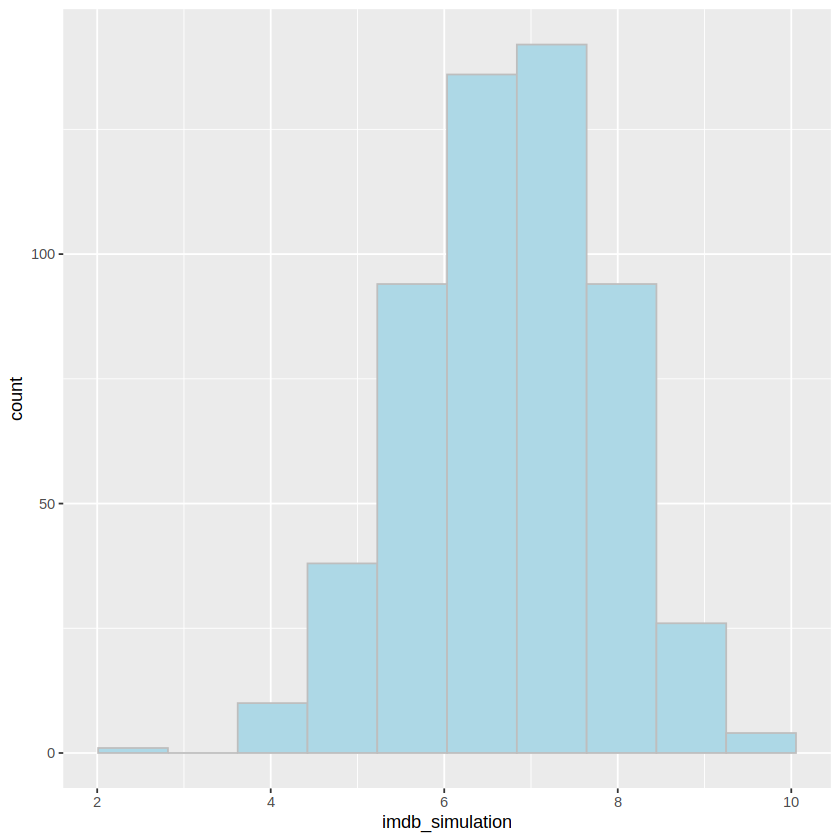

In [38]:
# Побудуємо гістограму для цієї симуляції:
ggplot(movie_body_counts, aes(x=imdb_simulation)) +
 geom_histogram(bins=10, color="grey", fill="lightblue") 

Для перевірки, чи є розподіл нормальним, використовується
функція qqplot. Давайте скористаємося нею для перевірки чи є
нормально розподілені дані рейтингу IMDB. Спочатку
побудуємо qqplot для нашої симуляції imdb_simulation:

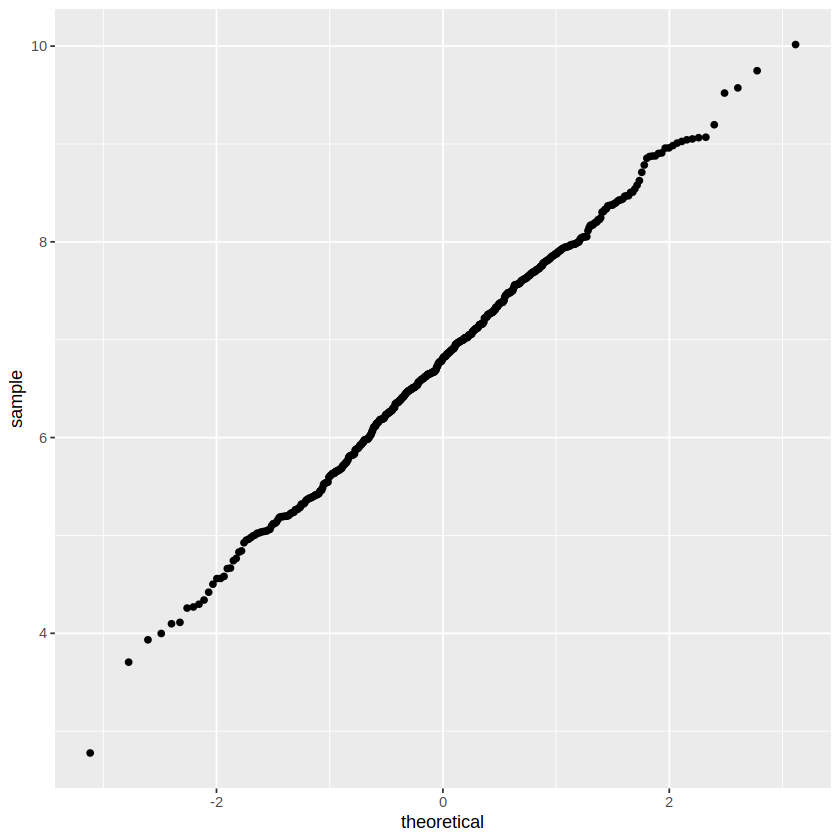

In [41]:
ggplot(movie_body_counts, aes(sample = imdb_simulation)) + stat_qq()

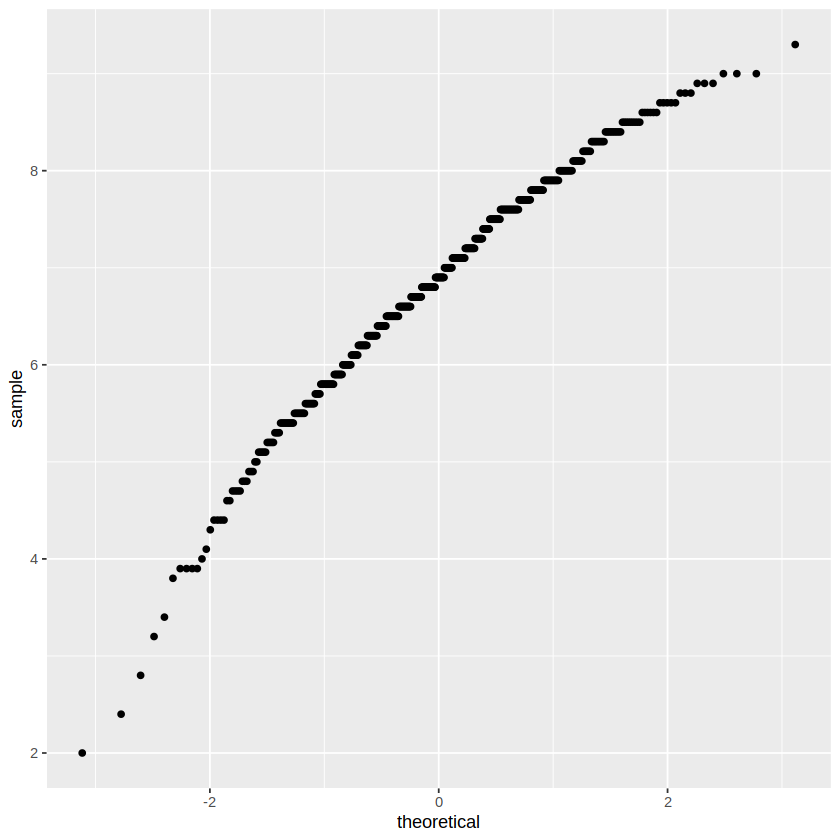

In [43]:
# А тепер для справжнього рейтингу IMDB_Rating:
ggplot(movie_body_counts, aes(sample = IMDB_Rating)) + stat_qq()

In [45]:
# Для згенерованого IMDB (змінна 'imdb_simulation'), яка ймовірність отримати IMDB 4.0 або менше?
pnorm(4.0, mean=6.83596330275229, sd=1.11351582775048)

[1] 0.00543493

In [47]:
# Для згенерованого IMDB (змінна imdb_simulation), яка ймовірність значення між 4 і 8?
pnorm(8.0, mean=6.83596330275229, sd=1.11351582775048)

[1] 0.8520741

In [49]:
# Знайдіть коефіцієнт кореляції між кількістю загиблих у фільмі та рейтином IMDB.
cor(movie_body_counts$Body_Count, movie_body_counts$IMDB_Rating)

[1] 0.07047715

Немає лінійної залежності між кількістю загиблих у фільмі та рейтином IMDB.